In [7]:
import matplotlib.pyplot as plt
from math import sin, pi

In [8]:
class rotary_table_2d:
    def __init__(self, DT, CurPos=(0, 0), max_rate=(720, 1200), max_accel=(100, 100)):
        self.T = 0
        self.DT = DT
        self.cur_pos = [CurPos[0], CurPos[1]]
        self.rate = [0, 0]
        self.accel = 0
        self.max_rate = max_rate
        self.max_accel = max_accel
        self.pos_history = [[CurPos[0]], [CurPos[1]]]
        self.rate_history = [[0], [0]]
        self.accel_history = [[0], [0]]
        self.time_history = [0]
        self.direct_key = 0

    def POS(self, AxisNumber, Position, Rate=100):

        if (AxisNumber == 1 and (Rate < 0 or Rate > self.max_rate[0])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 2 and (Rate < 0 or Rate > self.max_rate[1])):
            raise ValueError("Недопустимое значение скорости")
        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        self.rate[AxisNumber - 1] = Rate

        while (abs(Position - self.cur_pos[AxisNumber - 1]) > 1e-2):
            self.cur_pos[AxisNumber - 1] += Rate * self.DT
            self.check_pos()
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            self.accel_history[0] += [0]
            self.accel_history[1] += [0]
            self.T += self.DT
            self.time_history += [self.T]

#         print(self.cur_pos)
        self.rate = [0, 0]

    def PRS(self, AxisNumber, Position, Rate=10):

        if (AxisNumber == 1 and (Rate < 0 or Rate > self.max_rate[0])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 2 and (Rate < 0 or Rate > self.max_rate[1])):
            raise ValueError("Недопустимое значение скорости")
        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        self.rate[AxisNumber - 1] = Rate
        self.direct_key = 0

        while (abs(Position - self.cur_pos[AxisNumber - 1]) > 1e-1):
#             print(abs(360 - Position), abs(Position -
#                                            self.cur_pos[AxisNumber - 1]), self.direct_key)
            if abs(0 - Position) > abs(Position - self.cur_pos[AxisNumber - 1]) and (self.direct_key == 0):
                self.direct_key = 1
            else:
                self.direct_key = -1
            self.cur_pos[AxisNumber -
                         1] += self.direct_key * self.rate[AxisNumber - 1] * self.DT
            self.check_pos()
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            self.accel_history[0] += [0]
            self.accel_history[1] += [0]
            self.T += self.DT
            self.time_history += [self.T]

        self.rate = [0, 0]

    def PRV(self, AxisNumber, Position, Rate=10, Acceleration=10):

        self.rate[AxisNumber - 1] = 0

        if (AxisNumber == 1 and (Rate < 0 or Rate > self.max_rate[0])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 2 and (Rate < 0 or Rate > self.max_rate[1])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 1 and (Acceleration < 0 or Acceleration > self.max_accel[0])):
            raise ValueError("Недопустимое значение ускорения")
        if (AxisNumber == 2 and (Acceleration < 0 or Acceleration > self.max_accel[1])):
            raise ValueError("Недопустимое значение ускорения")
        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        self.direct_key = 0

        while (abs(Position - self.cur_pos[AxisNumber - 1]) % 360 > 1e-2):
            if self.rate[AxisNumber - 1] < Rate:
                self.rate[AxisNumber - 1] += Acceleration * self.DT

            if (abs(0 - Position) > abs(Position - self.cur_pos[AxisNumber - 1]) or \
                abs(360 - Position) > abs(Position - self.cur_pos[AxisNumber - 1])) and self.direct_key == 0:
                self.direct_key = 1
            else:
                self.direct_key = -1
            self.cur_pos[AxisNumber -
                         1] += self.direct_key * self.rate[AxisNumber - 1] * self.DT
            self.check_pos()
            #print(self.rate[AxisNumber - 1], self.cur_pos[AxisNumber - 1], 360 - abs(self.cur_pos[0]))
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            if AxisNumber == 1:
                self.accel_history[0] += [Acceleration]
                self.accel_history[1] += [0]
            else:
                self.accel_history[0] += [0]
                self.accel_history[1] += [Acceleration]
            self.T += self.DT
            self.time_history += [self.T]

        self.rate = [0, 0]

    def RAT(self, AxisNumber, TMODEL=60, Rate=10, Acceleration=10):

        self.rate[AxisNumber - 1] = 0

        if (AxisNumber == 1 and (Rate < 0 or Rate > self.max_rate[0])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 2 and (Rate < 0 or Rate > self.max_rate[1])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 1 and (Acceleration < 0 or Acceleration > self.max_accel[0])):
            raise ValueError("Недопустимое значение ускорения")
        if (AxisNumber == 2 and (Acceleration < 0 or Acceleration > self.max_accel[1])):
            raise ValueError("Недопустимое значение ускорения")
        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        T_start = self.T
        while (self.T - T_start < TMODEL):
            if self.rate[AxisNumber - 1] < Rate:
                self.rate[AxisNumber - 1] += Acceleration * self.DT
            self.cur_pos[AxisNumber - 1] += self.rate[AxisNumber - 1] * self.DT
            self.check_pos()
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            if AxisNumber == 1:
                self.accel_history[0] += [Acceleration]
                self.accel_history[1] += [0]
            else:
                self.accel_history[0] += [0]
                self.accel_history[1] += [Acceleration]
            self.T += self.DT
            self.time_history += [self.T]

        self.rate = [0, 0]

    def SIN(self, AxisNumber, TMODEL, Amp, Freq, Phase):

        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        T_start = self.T

        while (self.T - T_start < TMODEL):
            self.rate[AxisNumber - 1] = 2*pi*Freq*Amp * \
                sin(2*pi*Freq*(self.T - T_start) + Phase/57.3)
            self.cur_pos[AxisNumber - 1] += self.rate[AxisNumber - 1] * self.DT
            self.check_pos()
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            if AxisNumber == 1:
                self.accel_history[0] += [2*pi*Freq*2*pi*Freq*Amp *
                                          sin(2*pi*Freq*(self.T - T_start) + Phase/57.3 + pi/2)]
                self.accel_history[1] += [0]
            else:
                self.accel_history[1] += [2*pi*Freq*2*pi*Freq*Amp *
                                          sin(2*pi*Freq*(self.T - T_start) + Phase/57.3 + pi/2)]
                self.accel_history[0] += [0]
            self.T += self.DT
            self.time_history += [self.T]

        self.rate = [0, 0]

    def check_pos(self):
        self.cur_pos[0] = self.cur_pos[0] % 360 if self.cur_pos[0] > 0 else (
            360 - abs(self.cur_pos[0])) % 360
        self.cur_pos[1] = self.cur_pos[1] % 360 if self.cur_pos[1] > 0 else (
            360 - abs(self.cur_pos[1])) % 360

In [9]:
my_table = rotary_table_2d(0.0001)

my_table.POS(1, 150, 100)
# my_table.POS(1, 10, 500)
# my_table.PRS(1, 150, 200)
my_table.PRS(1, 15, 300)
# my_table.PRV(1, 200, 10, 1)
# my_table.RAT(1, 15, 10, 15)
# my_table.SIN(1, 15, 3, 0.5, 180)

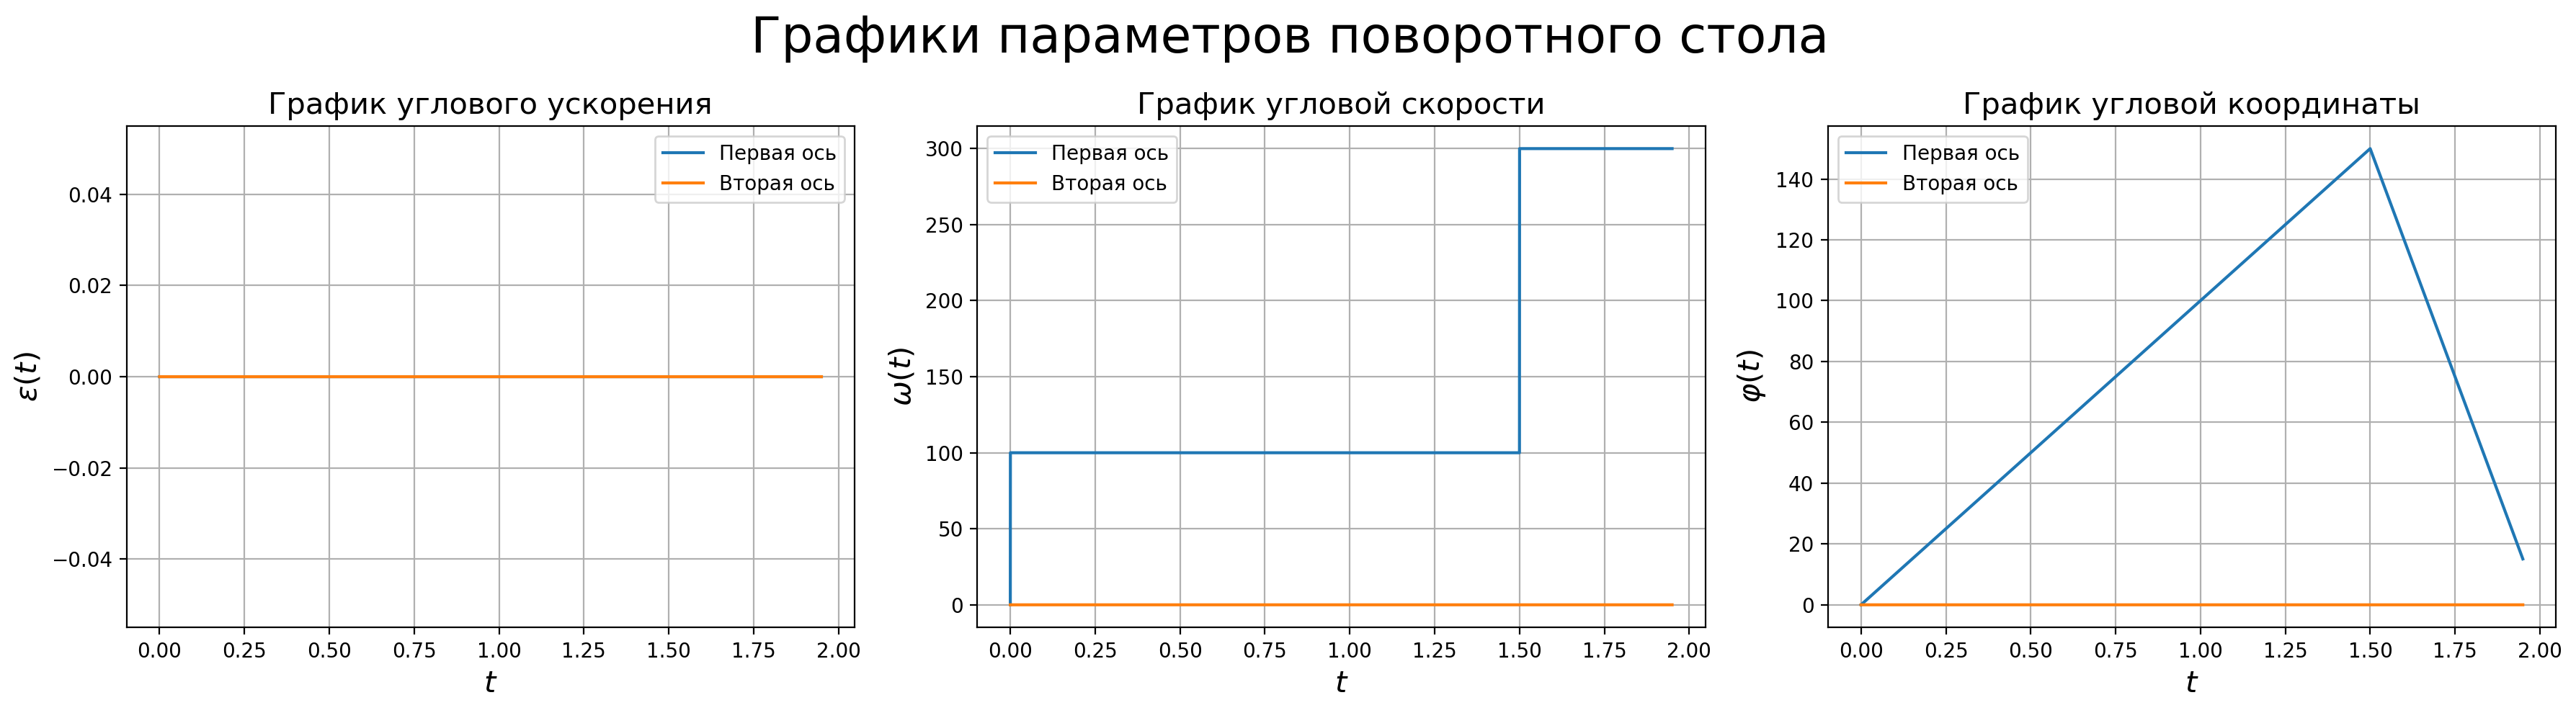

In [10]:
# plt.xkcd();
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), dpi=200)

axes[0].plot(my_table.time_history,
             my_table.accel_history[0], label="Первая ось")
axes[0].plot(my_table.time_history,
             my_table.accel_history[1], label="Вторая ось")
axes[0].set_title("График углового ускорения", fontsize=15)
axes[0].set_xlabel("$t$", fontsize=15)
axes[0].set_ylabel(r"$\varepsilon(t)$", fontsize=15)

axes[1].plot(my_table.time_history,
             my_table.rate_history[0], label="Первая ось")
axes[1].plot(my_table.time_history,
             my_table.rate_history[1], label="Вторая ось")
axes[1].set_title("График угловой скорости", fontsize=15)
axes[1].set_xlabel("$t$", fontsize=15)
axes[1].set_ylabel(r"$\omega(t)$", fontsize=15)

axes[2].plot(my_table.time_history,
             my_table.pos_history[0], label="Первая ось")
axes[2].plot(my_table.time_history,
             my_table.pos_history[1], label="Вторая ось")
axes[2].set_title("График угловой координаты", fontsize=15)
axes[2].set_xlabel("$t$", fontsize=15)
axes[2].set_ylabel(r"$\varphi(t)$", fontsize=15)

for ax in axes:
    ax.grid()
    ax.legend(prop={'size': 10})

fig.suptitle("Графики параметров поворотного стола", fontsize=25)
fig.tight_layout()

In [11]:
my_table.POS(2, 200, 250)
my_table.POS(2, 50, 250)
my_table.PRS(2, 150, 200)
my_table.PRS(2, 40, 1000)
my_table.PRV(2, 150, 500, 1)
my_table.RAT(2, 15, 10, 15)
my_table.SIN(2, 15, 3, 0.5, 180)